In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Simple Network

In [101]:
x1 = torch.randn(300, 1)
x2 = torch.randn(300, 1) + 1.5
x = torch.cat((x1, x2), 1)

x1_test = torch.randn(20, 1)
x2_test = torch.randn(20, 1) + 1.5
x_test = torch.cat((x1_test, x2_test), 1)

In [102]:
y = x1 * 1.2354 + (x2**2) * 2.354 + torch.randn([300,1])
y_test = x1_test * 1.2354 + (x2_test**2) * 2.354 + torch.randn([20,1])

In [160]:
model1 = nn.Sequential(
    nn.Linear(2, 1)
)

# loss function
criterion = nn.MSELoss()
optimizer = optim.SGD(model1.parameters(), lr=0.01) # Define our optimizer

In [161]:
# Using a loop to train
epochs = 100
all_loss = []
for e in range(epochs):
    running_loss = 0
    output = model1.forward(x) # Forward pass
    loss = criterion(output, y) # calculate loss
    running_loss += loss.item()

    loss.backward() # Calculate gradients

    optimizer.step() # Update weights
    optimizer.zero_grad() # zero out gradients

    print(f"Training loss: {running_loss/len(x)}")
    all_loss.append(running_loss)

Training loss: 0.44483296712239584
Training loss: 0.38726348876953126
Training loss: 0.3386761983235677
Training loss: 0.29766136169433594
Training loss: 0.26303054809570314
Training loss: 0.23378229777018228
Training loss: 0.20907213846842448
Training loss: 0.18818834940592447
Training loss: 0.1705310312906901
Training loss: 0.155594482421875
Training loss: 0.14295235951741536
Training loss: 0.13224536895751954
Training loss: 0.12317049662272135
Training loss: 0.1154723866780599
Training loss: 0.10893580118815104
Training loss: 0.10337918599446615
Training loss: 0.09864959081013998
Training loss: 0.0946179707845052
Training loss: 0.0911755625406901
Training loss: 0.08823073069254557
Training loss: 0.08570610046386719
Training loss: 0.08353651682535808
Training loss: 0.0816669782002767
Training loss: 0.08005112330118815
Training loss: 0.07864988327026368
Training loss: 0.07743022918701171
Training loss: 0.07636437733968099
Training loss: 0.07542885462443034
Training loss: 0.07460386912

In [162]:
model1.forward(x_test).data

tensor([[ 9.5120],
        [ 6.7084],
        [10.3579],
        [13.0380],
        [11.3834],
        [11.2106],
        [14.6789],
        [ 6.3233],
        [ 7.8473],
        [-5.3259],
        [10.7664],
        [13.9239],
        [ 7.7786],
        [16.6712],
        [ 7.8104],
        [ 2.2036],
        [11.8831],
        [18.3262],
        [ 9.4950],
        [20.9575]])

In [163]:
y_test

tensor([[ 4.9663],
        [ 3.0813],
        [ 9.0019],
        [10.3499],
        [ 9.8739],
        [ 8.2581],
        [14.8645],
        [ 3.1469],
        [ 5.2848],
        [ 3.0867],
        [ 7.9626],
        [13.4385],
        [ 4.3256],
        [16.8693],
        [ 6.3576],
        [ 1.0639],
        [ 8.4033],
        [22.9767],
        [ 6.2691],
        [30.4016]])

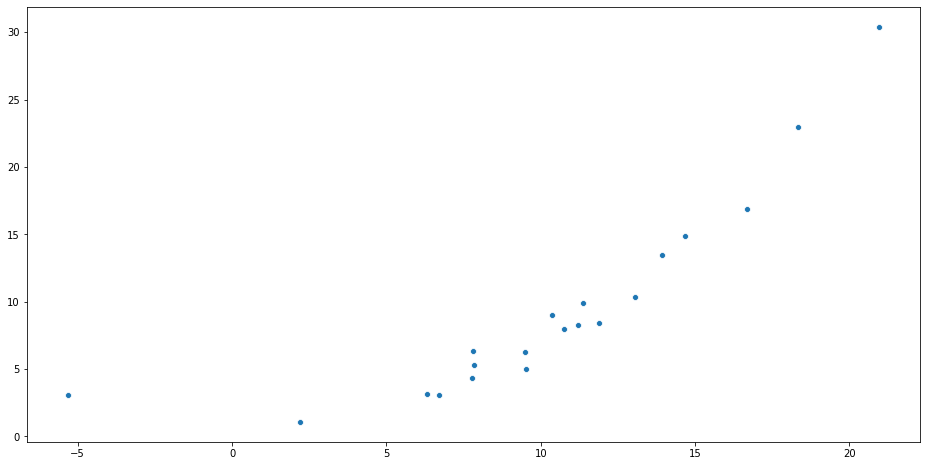

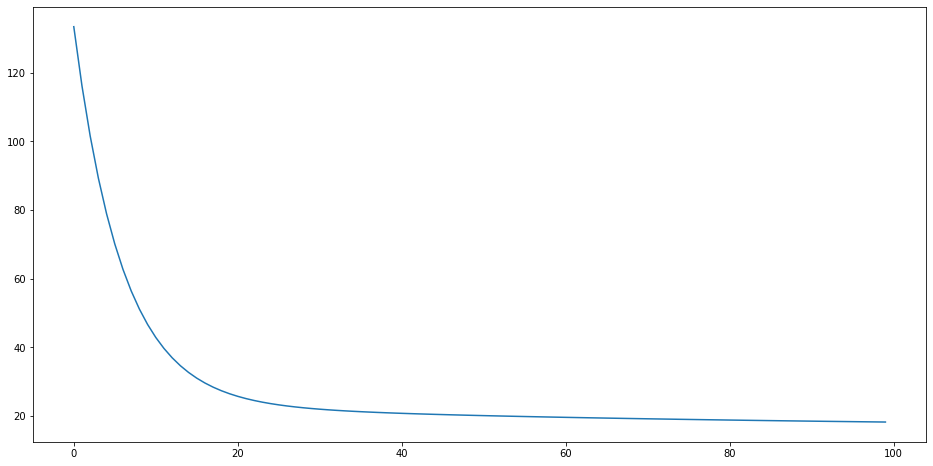

In [165]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=model1(x_test).data.numpy().reshape(-1), y=y_test.numpy().reshape(-1))
plt.show()

plt.figure(figsize=(16,8))
sns.lineplot(x=range(epochs), y=all_loss)
plt.show()

In [147]:
model2 = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)

# loss function
criterion = nn.MSELoss()
optimizer = optim.SGD(model2.parameters(), lr=0.01) # Define our optimizer

In [149]:
# Using a loop to train
epochs = 100
all_loss = []
for e in range(epochs):
    running_loss = 0
    output = model2.forward(x) # Forward pass
    loss = criterion(output, y) # calculate loss
    running_loss += loss.item()

    loss.backward() # Calculate gradients

    optimizer.step() # Update weights
    optimizer.zero_grad() # zero out gradients

    print(f"Training loss: {running_loss/len(x)}")
    all_loss.append(running_loss)

Training loss: 0.42128733317057293
Training loss: 0.3986675008138021
Training loss: 0.36160664876302084
Training loss: 0.29445177714029946
Training loss: 0.18367322285970053
Training loss: 0.10650822321573893
Training loss: 0.1001679801940918
Training loss: 0.09434918721516927
Training loss: 0.08893797556559245
Training loss: 0.08385213216145833
Training loss: 0.07904787063598633
Training loss: 0.07450641632080078
Training loss: 0.0702035649617513
Training loss: 0.06611523310343424
Training loss: 0.06219858805338541
Training loss: 0.05850694020589193
Training loss: 0.05502295811971029
Training loss: 0.05174321174621582
Training loss: 0.04869359334309896
Training loss: 0.04596874554951986
Training loss: 0.04358352979024251
Training loss: 0.04217380523681641
Training loss: 0.04149067242940267
Training loss: 0.04546864191691081
Training loss: 0.049823153813680014
Training loss: 0.07938548405965169
Training loss: 0.07262824376424154
Training loss: 0.1549384053548177
Training loss: 0.046962

In [150]:
model2(x_test)

tensor([[ 9.3917],
        [ 3.5485],
        [11.1606],
        [16.7712],
        [13.3191],
        [12.9562],
        [20.2118],
        [ 3.8816],
        [ 5.9238],
        [ 0.9187],
        [12.0168],
        [18.6344],
        [ 5.7827],
        [24.3975],
        [ 5.8540],
        [ 0.9105],
        [14.3736],
        [27.8676],
        [ 9.5645],
        [33.3966]], grad_fn=<AddmmBackward>)

In [151]:
y_test

tensor([[ 4.9663],
        [ 3.0813],
        [ 9.0019],
        [10.3499],
        [ 9.8739],
        [ 8.2581],
        [14.8645],
        [ 3.1469],
        [ 5.2848],
        [ 3.0867],
        [ 7.9626],
        [13.4385],
        [ 4.3256],
        [16.8693],
        [ 6.3576],
        [ 1.0639],
        [ 8.4033],
        [22.9767],
        [ 6.2691],
        [30.4016]])

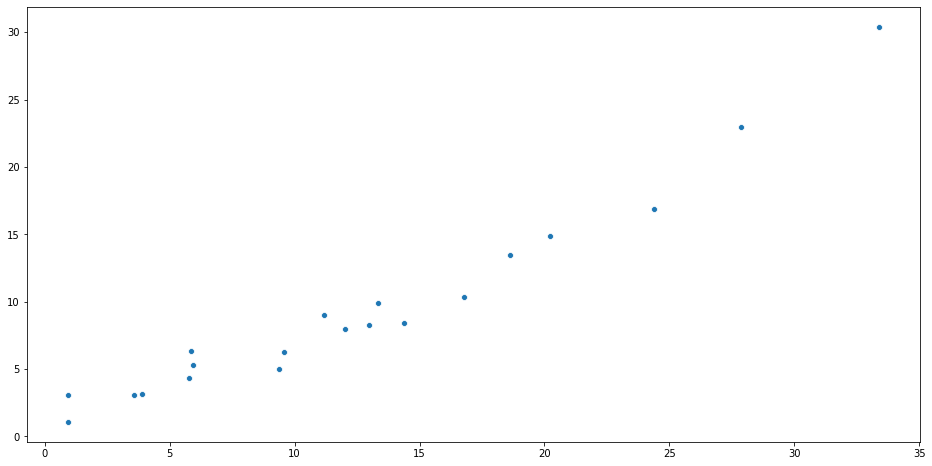

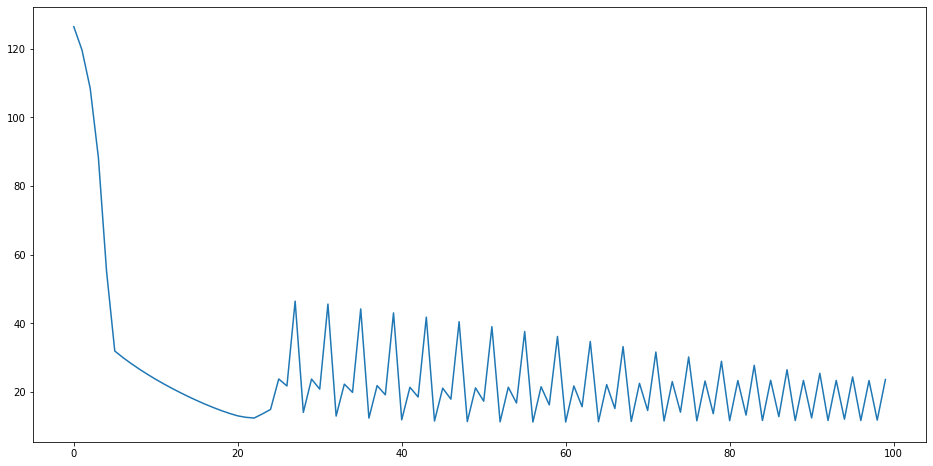

In [152]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=model2(x_test).data.numpy().reshape(-1), y=y_test.numpy().reshape(-1))
plt.show()

plt.figure(figsize=(16,8))
sns.lineplot(x=range(epochs), y=all_loss)
plt.show()

Learning rate seems to be too high causing the zig-zag loss function

Training loss: 0.453380126953125
Training loss: 0.45216339111328124
Training loss: 0.45096516927083335
Training loss: 0.4497832743326823
Training loss: 0.44861602783203125
Training loss: 0.4474617513020833
Training loss: 0.44631912231445314
Training loss: 0.4451874287923177
Training loss: 0.4440649922688802
Training loss: 0.44295079549153643
Training loss: 0.44184341430664065
Training loss: 0.44074234008789065
Training loss: 0.4396465555826823
Training loss: 0.438554941813151
Training loss: 0.4374671936035156
Training loss: 0.43638280232747395
Training loss: 0.4353004964192708
Training loss: 0.4342185974121094
Training loss: 0.4331357828776042
Training loss: 0.432052968343099
Training loss: 0.43096923828125
Training loss: 0.4298818969726563
Training loss: 0.4287916056315104
Training loss: 0.42769978841145834
Training loss: 0.42660326639811197
Training loss: 0.42550216674804686
Training loss: 0.4243940226236979
Training loss: 0.4232789611816406
Training loss: 0.42215863545735677
Trainin

Training loss: 0.01708697001139323
Training loss: 0.01701254367828369
Training loss: 0.016937769254048666
Training loss: 0.016863985061645506
Training loss: 0.016791146596272788
Training loss: 0.01671938419342041
Training loss: 0.01664868195851644
Training loss: 0.016579020818074545
Training loss: 0.016510365804036458
Training loss: 0.016442713737487794
Training loss: 0.016376007397969565
Training loss: 0.016310280164082844
Training loss: 0.01624497413635254
Training loss: 0.016179822285970053
Training loss: 0.016115652720133464
Training loss: 0.01605244795481364
Training loss: 0.015990185737609863
Training loss: 0.015928449630737303
Training loss: 0.015867633819580076
Training loss: 0.01580773671468099
Training loss: 0.01574875831604004
Training loss: 0.01569069703420003
Training loss: 0.01563333988189697
Training loss: 0.015576871236165364
Training loss: 0.015521039962768554
Training loss: 0.015465240478515625
Training loss: 0.015410262743631999
Training loss: 0.015356094042460123
Tr

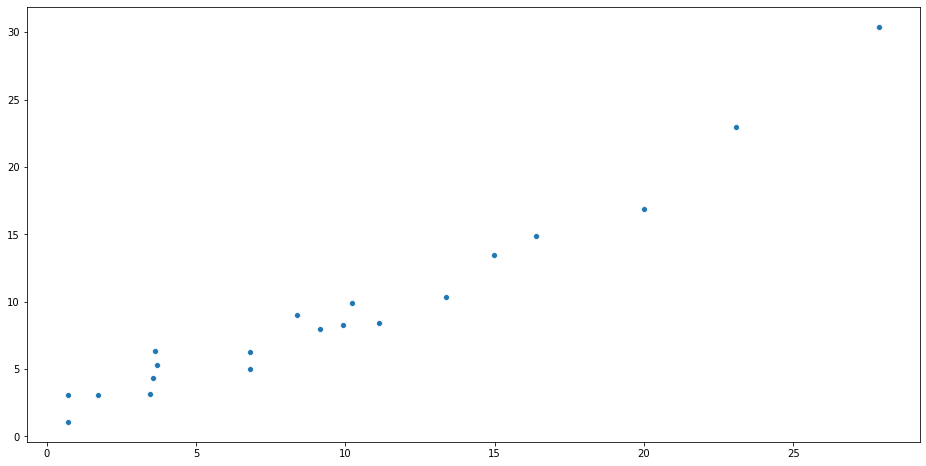

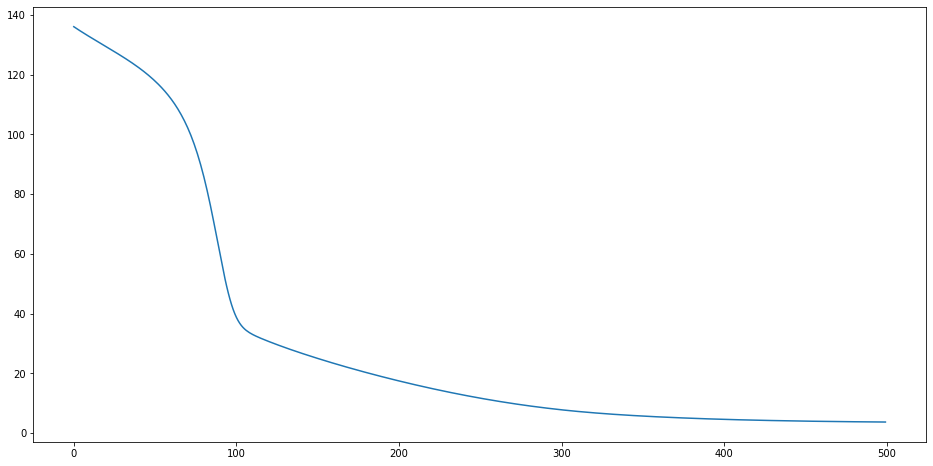

In [158]:
model3 = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)

# loss function
criterion = nn.MSELoss()
optimizer = optim.SGD(model3.parameters(), lr=0.001) # Define our optimizer

# Using a loop to train
epochs = 500
all_loss = []
for e in range(epochs):
    running_loss = 0
    output = model3.forward(x) # Forward pass
    loss = criterion(output, y) # calculate loss
    running_loss += loss.item()

    loss.backward() # Calculate gradients

    optimizer.step() # Update weights
    optimizer.zero_grad() # zero out gradients

    print(f"Training loss: {running_loss/len(x)}")
    all_loss.append(running_loss)
    
plt.figure(figsize=(16,8))
sns.scatterplot(x=model3(x_test).data.numpy().reshape(-1), y=y_test.numpy().reshape(-1))
plt.show()

plt.figure(figsize=(16,8))
sns.lineplot(x=range(epochs), y=all_loss)
plt.show()

## Saving and Loading models

In [182]:
output_dims_layers = []
for i in model3:
    try:
        output_dims_layers.append(i.out_features)
    except:
        continue

In [184]:
checkpoint = {
    'input_size' : 2,
    'output_size' : 1,
    'hidden_layers' : output_dims_layers,
    'state_dict' : model3.state_dict()
}

In [166]:
torch.save(checkpoint, path.pth)

OrderedDict([('0.weight', tensor([[0.8186, 5.9143]])),
             ('0.bias', tensor([-0.1296]))])

In [ ]:
checkpoint = torch.load(path.pth)

# Image Recognition using MLP

In [3]:
# Data augmentation & transformation
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

# Getting the data
trainset = datasets.MNIST(path, download=True, train=True, transform=transform)
#trainset = datasets.FashionMNIST(path, download=True, train=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)# Dataloader

testset = datasets.MNIST(path, download=True, train=False, transform=transform)
#testset = datasets.FashionMNIST(path, download=True, train=False, transform=transform)
testloader = DataLoader(testset, batch_size=32, shuffle=True)# Dataloader

NameError: name 'path' is not defined

In [ ]:
# Example 1
# Define network architecture
model = nn.Sequential(
    nn.Linear(784, 128), 
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    #nn.Dropout(p=0.2),
    nn.Linear(64, 10),
    nn.Softmax(dim=1)
)

# loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01) # Define our optimizer

# Data
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1) # Flatten

# Forward pass
logits = model.forward(images)
loss = criterion(logits, labels) # Calculate loss

loss.backward() # Calculate the Gradients for each layer

optimizer.step() # Taking 1 step and update the weights


# Calculating accuracy on test data
images, labels = next(iter(testloader))
images = images.view(images.shape[0], -1) # Flatten

# switch off gradients to save computation cost
with torch.no_grad():
    # model.eval() # if using dropout layers
    logits = model.forward(images)
    top_prob, top_class = logits.topk(1, dim=1) # Calculating the top probability and predicted class
    equals = top_class == labels.view(*top_class.shape) # if the class equals the labels
    torch.mean(equals.type(torch.FloatTensor))

In [ ]:
# Using a loop to train
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1) # Flatten
        
        output = model.forward(images) # Forward pass
        loss = criterion(output, labels) # calculate loss
        running_loss += loss.item()
        
        loss.backward() # Calculate gradients
        
        optimizer.step() # Update weights
        optimizer.zero_grad() # zero out gradients
        
    print(f"Training loss: {running_loss/len(trainloader)}")

In [ ]:
# Example 2
class Simple_Network(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        
        self.hidden1 = nn.Linear(input_size, 128)
        self.hidden2 = nn.Linear(128, 128)
        
        self.output = nn.Linear(128, 10)
        
    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.softmax(self.output(x), dim=1)
        
        return x